2.
Classification using Deep neural network:
Binary classification using Deep Neural Networks Example: Classify movie reviews into positive" reviews and "negative" reviews, just based on the text content of the reviews. Use IMDB dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models



# tensorflow (import tensorflow as tf):
# The main package for TensorFlow, which is a popular machine learning library developed by Google.
# It's used for building and training machine learning models, particularly deep learning models like neural networks.
# tensorflow.keras (from tensorflow import keras):
# Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow.
# It simplifies building, training, and evaluating deep learning models.
# tensorflow.keras.layers (from tensorflow.keras import layers):
# This module contains various layers for constructing neural networks. Examples include dense layers, convolutional layers, LSTM layers, etc.
# Each layer serves a specific purpose, such as connecting neurons in fully connected layers, applying convolutions in CNNs, or maintaining memory in RNNs.
# tensorflow.keras.models (from tensorflow.keras import models):
# This is used to define and build models. It provides functions like Sequential (to build models layer by layer) and Model (for more complex architectures).



In [2]:
# Load IMDB dataset
imdb = keras.datasets.imdb
# This imports the IMDB dataset from the tensorflow.keras.datasets module.
# The IMDB dataset consists of movie reviews and their corresponding 
# sentiment labels (positive or negative).


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# num_words=10000: This argument restricts the dataset to the top 10,000 most frequent words. 
# This helps reduce the size of the dataset

In [3]:
word_index = imdb.get_word_index()  # Load word-to-index dictionary
# This loads a dictionary that maps each word in the IMDB dataset to
# a unique integer. The dictionary is used to convert words into integer 
# indices when the data is loaded into train_data and test_data.

reverse_word_index = {value: key for key, value in word_index.items()}
# This creates a reverse mapping of the original word_index. 
# The new dictionary reverse_word_index will map integers (indices) back to words.

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
# This line decodes the first review in train_data back into words.
print(decoded_review)



? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [4]:

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Creates an all-zero matrix of shape (num_samples, 10000)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1  # Sets specific indices to 1 (one-hot encoding)
    return results

# Vectorize training and test data
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

# It will return a one-hot encoded matrix where each review is represented by a vector of length 10000, with 1s at the positions of the words that appear in the review and 0s elsewhere.

# In this code, the vectorize_sequences function is being used to convert the list of integer sequences 
# (which represent the words in a review) into a matrix of one-hot encoded vectors.


In [5]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
X_train.shape

(25000, 10000)

In [7]:
# train_labels and test_labels are originally Python lists of integers
# Convert labels to NumPy arrays of type float32
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
# Define the model
model = models.Sequential()

# Input Layer + First Hidden Layer (16 neurons, ReLU activation)
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

# Second Hidden Layer (16 neurons, ReLU activation)
model.add(layers.Dense(16, activation='relu'))

# Output Layer (1 neuron, Sigmoid activation for binary classification)
model.add(layers.Dense(1, activation='sigmoid'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
from tensorflow.keras import optimizers, losses, metrics
# Compile the model
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),  # RMSprop optimizer with a learning rate of 0.001
    loss=losses.binary_crossentropy,  # Binary cross-entropy loss for binary classification
    metrics=[metrics.binary_accuracy]  # Track binary accuracy during training
)

In [10]:
# Split the first 10,000 samples for validation
X_val = X_train[:10000]   # First 10,000 samples for validation
partial_X_train = X_train[10000:]  # Remaining samples for training

# Split labels accordingly
y_val = y_train[:10000]   # First 10,000 labels for validation
partial_y_train = y_train[10000:]  # Remaining labels for training


In [11]:
# Train the model
history = model.fit(
    partial_X_train,  # Training data (excluding validation set)
    partial_y_train,  # Training labels
    epochs=20,  # Train for 20 epochs
    batch_size=512,  # Process 512 samples per batch
    validation_data=(X_val, y_val)  # Validate using the validation set
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - binary_accuracy: 0.6933 - loss: 0.6082 - val_binary_accuracy: 0.8367 - val_loss: 0.4296
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.8901 - loss: 0.3521 - val_binary_accuracy: 0.8768 - val_loss: 0.3268
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.9162 - loss: 0.2570 - val_binary_accuracy: 0.8583 - val_loss: 0.3384
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - binary_accuracy: 0.9335 - loss: 0.2049 - val_binary_accuracy: 0.8846 - val_loss: 0.2881
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - binary_accuracy: 0.9445 - loss: 0.1710 - val_binary_accuracy: 0.8827 - val_loss: 0.2893
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - binary_accuracy: 0.9573 - loss: 0.1441 - val_binary_accuracy: 0.8845 - val_loss: 0.2892
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - binary_accuracy: 0.9626 - loss: 0.1220 - val_binary_accuracy: 0.8787 - val_loss: 0.3038
Epoch 8/20
30

In [12]:
# Extract history dictionary
history_dict = history.history
# Display available keys in history
print(history_dict.keys())

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])


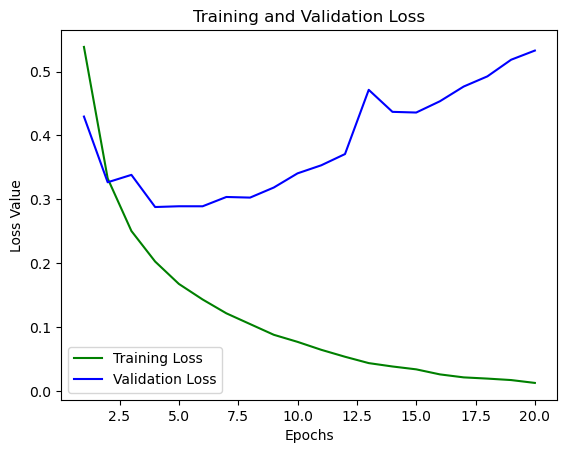

In [13]:
# used to visualize the model's performance during training. Specifically, it helps you understand 
# how well your model is learning and whether it is overfitting or underfitting
# Extract loss values
loss_values = history_dict['loss']  # Training loss
val_loss_values = history_dict['val_loss']  # Validation loss

# Get the number of epochs
epochs = range(1, len(loss_values) + 1)
# Plot training and validation loss
plt.plot(epochs, loss_values, 'g', label="Training Loss")  # Green line for training loss
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")  # Blue line for validation loss
# Formatting the plot
plt.title('Training and Validation Loss')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss Value')  # Y-axis label
plt.legend()  # Show legend (Training Loss, Validation Loss)
# Display the plot
plt.show()

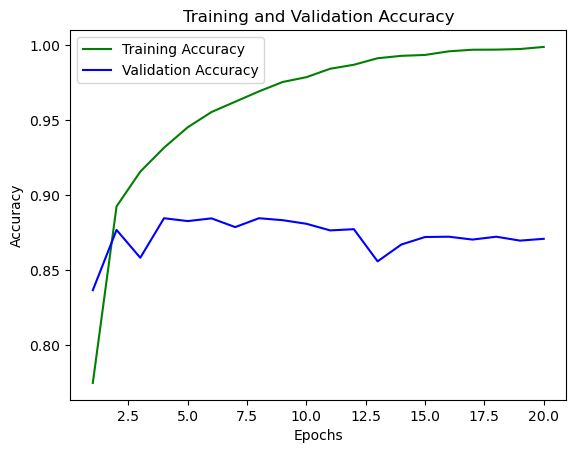

In [14]:
# Extract accuracy values
acc_values = history_dict['binary_accuracy']  # Training accuracy
val_acc_values = history_dict['val_binary_accuracy']  # Validation accuracy

# Get the number of epochs
epochs = range(1, len(acc_values) + 1)

# Plot training and validation accuracy
plt.plot(epochs, acc_values, 'g', label="Training Accuracy")  # Green line for training accuracy
plt.plot(epochs, val_acc_values, 'b', label="Validation Accuracy")  # Blue line for validation accuracy

# Formatting the plot
plt.title('Training and Validation Accuracy')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.legend()  # Show legend (Training Accuracy, Validation Accuracy)

# Display the plot
plt.show()

In [15]:
# Retrain the model for only 3 epochs
history = model.fit(
    partial_X_train,  # Training data (excluding validation set)
    partial_y_train,  # Training labels
    epochs=3,  # Train for only 3 epochs
    batch_size=512,  # Process 512 samples per batch
    validation_data=(X_val, y_val)  # Validate using the validation set
)

Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - binary_accuracy: 0.9993 - loss: 0.0095 - val_binary_accuracy: 0.8701 - val_loss: 0.5502
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.9997 - loss: 0.0069 - val_binary_accuracy: 0.8689 - val_loss: 0.5728
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - binary_accuracy: 0.9986 - loss: 0.0098 - val_binary_accuracy: 0.8698 - val_loss: 0.5901


In [16]:
# Suppress scientific notation for better readability
np.set_printoptions(suppress=True)
# Make predictions on test data
result = model.predict(X_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [17]:
result

array([[0.00499177],
       [0.99999946],
       [0.88116467],
       ...,
       [0.000517  ],
       [0.00310972],
       [0.9408313 ]], dtype=float32)

In [18]:
# Initialize an array of zeros to store predicted labels
y_pred = np.zeros(len(result))
# Convert probabilities to binary labels (0 or 1)
for i, score in enumerate(result):
    y_pred[i] = np.round(score)

C:\Users\sujit\AppData\Local\Temp\ipykernel_15124\2159363129.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.round(score)


In [19]:
from sklearn import metrics
# Compute Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)

# The mean_absolute_error function calculates the mean absolute error
# between the true labels (y_test) and the predicted labels (y_pred).
# MAE is a common evaluation metric for regression tasks, and it
# measures the average absolute difference between the predicted and true values. 




In [20]:
mae

0.14088